In [1]:
from qiskit import QuantumCircuit, Aer, transpile, IBMQ, execute, assemble
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import least_busy 
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, random_statevector
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, Aer, transpile, assemble
from qiskit.visualization import array_to_latex
from qiskit_experiments.library import LocalReadoutError, CorrelatedReadoutError

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info.analysis import hellinger_fidelity
from qiskit.visualization import plot_state_city, plot_gate_map

def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)

In [2]:
provider = IBMProvider(token="c4f42151ea981ccbec57377eb5a96dac822d734b7d169cc5f56b18acaf1595fcb0514c5870b8498565416fbfcebb8f48daa87805136bbdfcddd445ac962541f2")
backend = provider.get_backend("ibm_canberra")
#backend = provider.get_backend("ibmq_kolkata")

In [3]:
Alice = QuantumRegister(3, name="Alice")
Bob = QuantumRegister(3, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(3, name="C_A")
C_B = ClassicalRegister(3, name="C_B")

A1, A2, A3 = Alice
B1, B2, B3 = Bob

CUM = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM.u(alpha_b, beta_b, gamma_b, b)

CUM.h(A1)
CUM.cx(A1, B1)
CUM.cx(A1, A2)

CUM.h(B2)
CUM.cx(B2, A3)
CUM.cx(B2, B3)

CUM.barrier(range(8))

CUM.cx(a, A1)
CUM.cx(a, A2)
CUM.h(a)

CUM.cx(b, B3)
CUM.cx(b, B2)
CUM.h(b)

CUM.barrier(range(8))

CUM.measure(a, C_A[0])
CUM.measure(A1, C_A[1])
CUM.measure(A2, C_A[2])


CUM.measure(b, C_B[0])
CUM.measure(B2, C_B[1])
CUM.measure(B3, C_B[2])

CUM.barrier(range(8))

In [4]:
transpiled_circuit = transpile(CUM, backend)

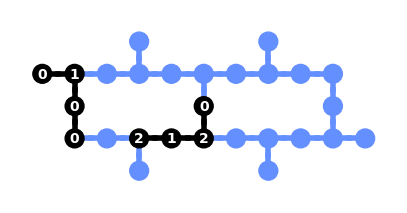

In [5]:
plot_circuit_layout(transpiled_circuit, backend)

In [6]:
job_run_on_backend_1 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_2 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_3 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_4 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_5 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_6 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_7 = backend.run(transpiled_circuit, shots = 4096*16)
job_run_on_backend_8 = backend.run(transpiled_circuit, shots = 4096*16)

In [7]:
noise_model = get_noise(0.01)

data_ErrorDataArray = np.zeros((64,64))
for state in ['000000','000001','000010','000011','000100','000101','000110','000111',
              '001000','001001','001010','001011','001100','001101','001110','001111',
              '010000','010001','010010','010011','010100','010101','010110','010111',
              '011000','011001','011010','011011','011100','011101','011110','011111',
              '100000','100001','100010','100011','100100','100101','100110','100111',
              '101000','101001','101010','101011','101100','101101','101110','101111',
              '110000','110001','110010','110011','110100','110101','110110','110111',
              '111000','111001','111010','111011','111100','111101','111110','111111']:
    R = QuantumRegister(6)
    C = ClassicalRegister(6)
    qc_6_measure = QuantumCircuit(R, C)
    
    if state[0]=='1':
        qc_6_measure.x(5)
    if state[1]=='1':
        qc_6_measure.x(4)  
    if state[2]=='1':
        qc_6_measure.x(3)
    if state[3]=='1':
        qc_6_measure.x(2)
    if state[4]=='1':
        qc_6_measure.x(1)
    if state[5]=='1':
        qc_6_measure.x(0)
    qc_6_measure.measure(R, C)
    
    if (state[3]=='1' and state[4]=='1' and state[5]=='1'):
        print('processing ' + state)
    
    aersim = Aer.get_backend('aer_simulator')
    
    job_measure_at_backend = aersim.run(qc_6_measure, noise_model=noise_model, shots = int(np.power(2, 6*2)))
    
    counts_measure = job_measure_at_backend.result().get_counts()
    for i in counts_measure.keys():
        data_ErrorDataArray[int(state[0])*32+int(state[1])*16+int(state[2])*8+int(state[3])*4+int(state[4])*2+int(state[5])][int(i[0])*32+int(i[1])*16+int(i[2])*8+int(i[3])*4+int(i[4])*2+int(i[5])] += counts_measure.get(i)
    
data_ErrorMetricArray = data_ErrorDataArray/counts_measure.shots()

print(data_ErrorDataArray)

processing 000111
processing 001111
processing 010111
processing 011111
processing 100111
processing 101111
processing 110111
processing 111111
[[3832.   43.   44.    0.   48.    1.    0.    0.   34.    1.    0.    0.    1.    0.    0.    0.   39.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   52.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  40. 3863.    0.   38.    0.   36.    0.    0.    0.   45.    0.    0.    0.    1.    0.    0.    1.   31.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   35.    0.    1.    0.    2.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  36.    0. 3850.   46.    0.    0.   40.    1.    0.    0.   49.    0.    0.   

In [8]:
CUM_dataArray = np.zeros((8,8))

plot_histogram(job_run_on_backend_1.result().get_counts())
plot_histogram(job_run_on_backend_2.result().get_counts())
plot_histogram(job_run_on_backend_3.result().get_counts())
plot_histogram(job_run_on_backend_4.result().get_counts())
plot_histogram(job_run_on_backend_5.result().get_counts())
plot_histogram(job_run_on_backend_6.result().get_counts())
plot_histogram(job_run_on_backend_7.result().get_counts())
plot_histogram(job_run_on_backend_8.result().get_counts())

dict_keys_1 = job_run_on_backend_1.result().get_counts().keys()
dict_keys_2 = job_run_on_backend_2.result().get_counts().keys()
dict_keys_3 = job_run_on_backend_3.result().get_counts().keys()
dict_keys_4 = job_run_on_backend_4.result().get_counts().keys()
dict_keys_5 = job_run_on_backend_6.result().get_counts().keys()
dict_keys_6 = job_run_on_backend_6.result().get_counts().keys()
dict_keys_7 = job_run_on_backend_7.result().get_counts().keys()
dict_keys_8 = job_run_on_backend_8.result().get_counts().keys()

for i in dict_keys_1:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_1.result().get_counts().get(i)
for i in dict_keys_2:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_2.result().get_counts().get(i)
for i in dict_keys_3:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_3.result().get_counts().get(i)
for i in dict_keys_4:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_4.result().get_counts().get(i)
for i in dict_keys_5:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_5.result().get_counts().get(i)
for i in dict_keys_6:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_6.result().get_counts().get(i)
for i in dict_keys_7:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_7.result().get_counts().get(i)
for i in dict_keys_8:
    CUM_dataArray[(int(i[2])*4+int(i[1])*2+int(i[0]))][(int(i[6])*4+int(i[5])*2+int(i[4]))] += job_run_on_backend_8.result().get_counts().get(i)    

print(CUM_dataArray)

[[28702.  5982.  2918. 25709. 29064.  5871.  3152. 25742.]
 [ 3622.   749.   352.  3231.  3588.   710.   375.  3308.]
 [10826.  2319.  1064. 10006. 11170.  2237.  1170. 10195.]
 [18663.  3965.  1884. 16856. 18656.  3922.  1977. 16774.]
 [25842.  5381.  2549. 22893. 25558.  5309.  2756. 23505.]
 [ 3167.   649.   326.  2840.  3220.   658.   340.  2989.]
 [10076.  2081.  1028.  8966. 10369.  2090.  1147.  9046.]
 [17620.  3542.  1743. 15316. 17568.  3539.  1839. 15577.]]


In [9]:
CUM_data_vector = np.zeros((64, 1))
for i in range(8):
    for j in range(8):
        CUM_data_vector[i*8+j][0]=CUM_dataArray[i][j]
    
#print(CUM_data_vector)

In [10]:
import scipy.linalg as la

CUM_data_vector = np.dot(la.inv(data_ErrorMetricArray), CUM_data_vector)

#print(CUM_data_vector)

In [11]:
CUM_mitigation_data_array = np.zeros((8, 8))

for i in range(8):
    for j in range(8):
        CUM_mitigation_data_array[i][j] = CUM_data_vector[i*8+j][0]

np.set_printoptions(precision=0)    

print(CUM_dataArray)
print()

print(CUM_mitigation_data_array)
print()

print(CUM_mitigation_data_array-CUM_dataArray)
print()

[[28702.  5982.  2918. 25709. 29064.  5871.  3152. 25742.]
 [ 3622.   749.   352.  3231.  3588.   710.   375.  3308.]
 [10826.  2319.  1064. 10006. 11170.  2237.  1170. 10195.]
 [18663.  3965.  1884. 16856. 18656.  3922.  1977. 16774.]
 [25842.  5381.  2549. 22893. 25558.  5309.  2756. 23505.]
 [ 3167.   649.   326.  2840.  3220.   658.   340.  2989.]
 [10076.  2081.  1028.  8966. 10369.  2090.  1147.  9046.]
 [17620.  3542.  1743. 15316. 17568.  3539.  1839. 15577.]]

[[29708.  5635.  2434. 26454. 30150.  5520.  2806. 26612.]
 [ 3252.   624.   267.  2913.  3242.   572.   277.  2979.]
 [10675.  2066.   841.  9914. 11137.  2025.   923. 10086.]
 [19257.  3752.  1601. 17353. 19202.  3649.  1680. 17228.]
 [26731.  5013.  2068. 23578. 26231.  4951.  2286. 24214.]
 [ 2898.   536.   255.  2572.  2881.   517.   238.  2657.]
 [ 9964.  1854.   834.  8848. 10305.  1887.   953.  9004.]
 [18127.  3356.  1481. 15813. 18059.  3302.  1565. 16025.]]

[[1006. -347. -484.  745. 1086. -351. -346.  870.]
 

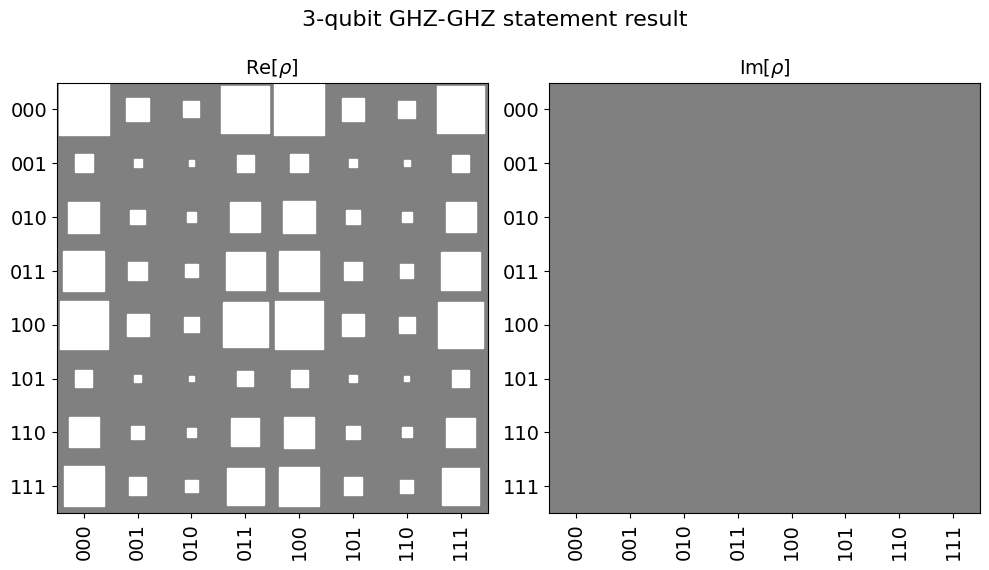

In [12]:
CUM_Densitymatrix = DensityMatrix(CUM_dataArray)
plot_state_hinton(CUM_Densitymatrix,
                  title="3-qubit GHZ-GHZ statement result",
                  figsize=(10,6))

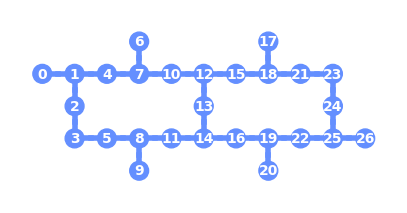

In [13]:
plot_gate_map(backend)

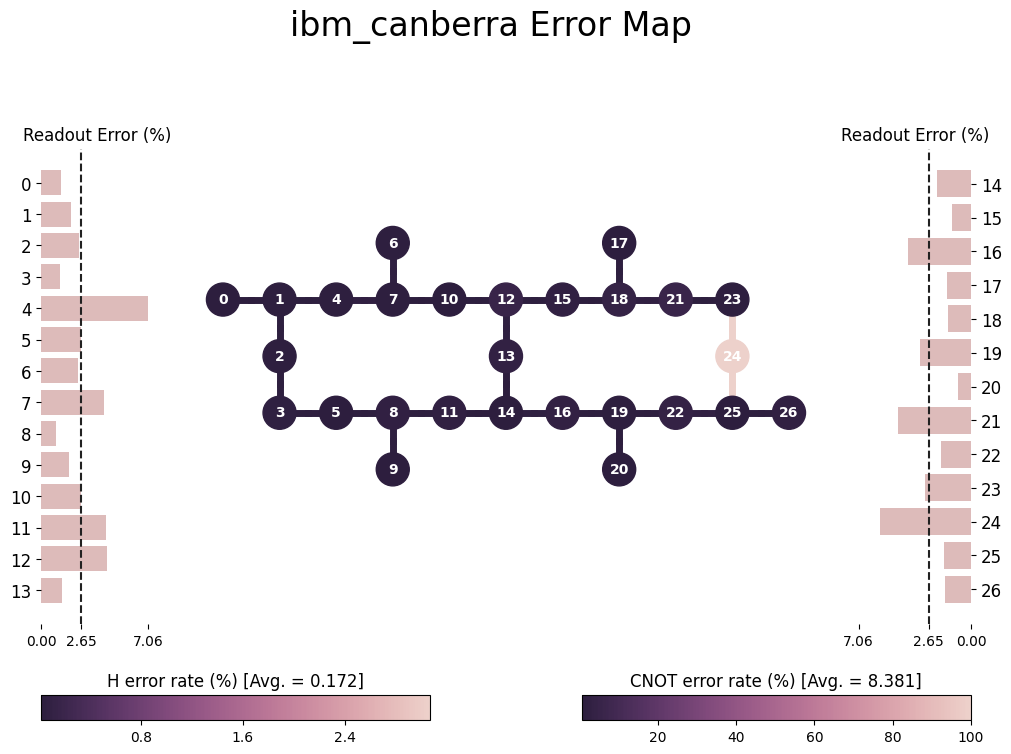

In [14]:
plot_error_map(backend)